# Hyperparameter Tuning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('data4.csv')

In [3]:
# splitting the data into train and test
X = df.drop(['Life expectancy'], axis=1).values
y = df['Life expectancy'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [4]:
# function to compute the score for each of the models
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)    
    y_pred= model.predict(X_test)

    # printing the errors to compare the results
    mae_sklearn = mean_absolute_error(y_pred, y_test)
    mse_sklearn = mean_squared_error(y_pred, y_test)

    # print errors
    print("mean absolute error: {}".format(mae_sklearn))
    print("mean squared error: {}".format(mse_sklearn))

    # model score
    score = r2_score(y_test, y_pred)
    print("model score: {}".format(score))

I will try to use different algorithms in order to find the most suitable model

## KNeighborsRegressor

Plotting the errors for different numbers of the parameter n_neighbors in order to select the best fit

Text(0, 0.5, 'error')

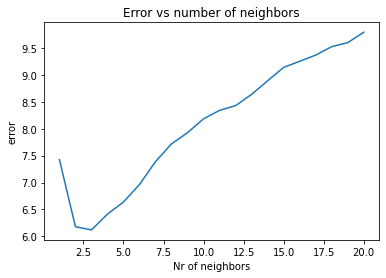

In [5]:
# initializing an array filled with 0s in which we will save errors
errors = np.zeros(20)

#initializing an array with the number of neighbors (range 1 - 10)
neigh_nr = np.arange(1,21)

# computing model accuracy for each of the values in neigh_nr
for i in range(0, 20):
    neigh = KNeighborsRegressor(n_neighbors = i+1)
    neigh.fit(X_train, y_train)
    neigh_pred = neigh.predict(X_test)
    errors[i] = mean_squared_error(y_test, neigh_pred)
    
# plotting the model accurac in accordance with the number of neighbors
plot = plt.plot(neigh_nr, errors)
plt.title("Error vs number of neighbors")
plt.xlabel("Nr of neighbors")
plt.ylabel("error")    

I got the lowest error when n_neighbors = 3. Let's print the scores for this model:

In [6]:
# printing the score for the knn Regressor model
knr = KNeighborsRegressor(n_neighbors = 3)
get_score(knr, X_train, X_test, y_train, y_test)

mean absolute error: 1.5643446852425178
mean squared error: 6.118508771929825
model score: 0.9143514226181456


## DecisionTreeRegressor

Plotting the errors for combinations between defferent kernel and max_depth values

[Text(0.5, 285.0, 'max_depht'),
 Text(69.0, 0.5, 'max_features'),
 Text(0.5, 1.0, "DecisionTreeRegresor, criterion = 'friedman_mse'")]

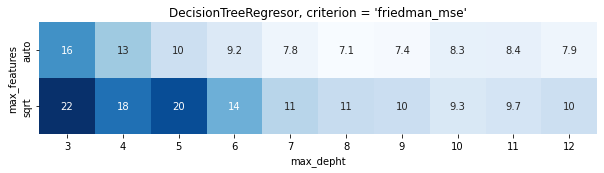

In [7]:
# initializng 2 arrays with hyperparameters
depths = np.arange(3, 13)
features = ['auto', 'sqrt']

# creating a 2d array filled with 0s. Will be filled with the mse values for each combination of hyperparameters
error = np.zeros([2, 10])

# itterating trough every possible combination of parameters
for i in range(len(features)):
    for j in range(len(depths)):
        clf = DecisionTreeRegressor(max_depth = depths[j], max_features = features[i], criterion = 'friedman_mse', random_state = 42)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        error[i][j] = mean_squared_error(y_test, pred)
# since 'None' is not a string in the array of feaures above, we save here the labels for the x-axis
x_axis_labels = ['auto', 'sqrt']

# plotting the heatmap with the accuracy for each combination of parameters
plt.figure(figsize = (10,10))
h = sns.heatmap(error, xticklabels=depths, yticklabels=x_axis_labels, annot=True, cbar=False, square=True, cmap='Blues')
h.set(xlabel='max_depht', ylabel='max_features', title = "DecisionTreeRegresor, criterion = 'friedman_mse'")

The lowest error was obtained when max_features = auto (which actually means that max_features=n_features) and max_depth = 8.

In [8]:
# printing the score for the DecisionTreeRegressor model
dtr = DecisionTreeRegressor(max_depth = 8, max_features = 'auto', criterion = 'friedman_mse', random_state = 42)
get_score(dtr, X_train, X_test, y_train, y_test)

mean absolute error: 1.7379945245637562
mean squared error: 7.144609423494994
model score: 0.8999877820101039


## RandomForestRegressor

plotting the errors obtained for combinations bwtween different criterion and n_estimators values

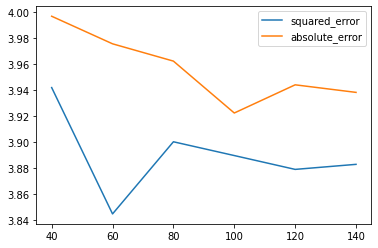

In [9]:
# initializng 2 arrays with hyperparameters
crit = ["squared_error", "absolute_error"]
estimators = np.arange(40, 160, step = 20)

# itterating trough every possible combination of hyperparameters from the arrays above
for c in crit:
    errors = np.zeros(6)
    i = 0
    for e in estimators:
        clf = RandomForestRegressor(criterion = c, n_estimators = e, random_state = 42)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        errors[i] = mean_squared_error(y_test, pred)
        i += 1
        
    # plotting the line for criterion c
    plt.plot(estimators, errors, label = c)
plt.legend()
plt.show()

The lowest error was obtained when criterion = 'squared_error' and n_estimators = 60.

In [10]:
# printing the score for the RandomForestRegressor model
rfr = RandomForestRegressor(criterion = 'squared_error', n_estimators = 60, random_state = 42)
get_score(rfr, X_train, X_test, y_train, y_test)

mean absolute error: 1.153284313725491
mean squared error: 3.8445214869281035
model score: 0.9461833253259344


## SVR

In [11]:
# imports
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [12]:
# choosing the values of the hyperparameters
tuned_parameters = {
    'epsilon' : [0.1, 0.2, 0.3, 0.4, 0.5],
    'C' : [1, 10, 100, 1000]
}

In [13]:
# initializing GridSearchCV for the SVC algorithm, using the combinations of parameters above
clf = GridSearchCV(SVR(), tuned_parameters)
# fitting the model
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [14]:
# looking at the best found parameters
clf.best_params_

{'C': 100, 'epsilon': 0.4}

In [15]:
# initializing the model with the best found parameters and printing its errors and score
svr = SVR(C = 100, epsilon = 0.4)
svr.fit(X_train, y_train)
get_score(svr, X_train, X_test, y_train, y_test)

mean absolute error: 1.3956847666720549
mean squared error: 5.250920838631922
model score: 0.9264961583716569


## Generalized Results

<b>KNeighborsRegressor</b><br>
mean absolute error: 1.5643446852425178<br>
mean squared error: 6.118508771929825<br>
model score: 0.9143514226181456<br>

<b>DecisionTreeRegressor</b><br>
mean absolute error: 1.7379945245637562<br>
mean squared error: 7.144609423494994<br>
model score: 0.8999877820101039<br>

<b>RandomForestRegressor</b><br>
mean absolute error: 1.153284313725491<br>
mean squared error: 3.8445214869281035<br>
model score: 0.9461833253259344<br>

<b>SVR</b><br>
mean absolute error: 1.3956847666720549<br>
mean squared error: 5.250920838631922<br>
model score: 0.9264961583716569<br>

#### Best results:

1st - RandomForestRegressor <br>
2nd - SVR<br>
3rd - KNeighborsRegressor<br>
4th - DecisionTreeRegressor<br>